In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns
import plotly as py
import cufflinks as cf
import plotly.offline as pyo
import plotly.graph_objs as go
cf.go_offline(connected=True)
import chart_studio
from matplotlib import font_manager, rc
import scipy.stats as stats
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)
from fbprophet import Prophet 

In [3]:
df = pd.read_excel("2019~ 2020 테스트 검색 데이터 전국 일별.xlsx", header=0)
df

,date,moc
0,2019-01-01,438460
1,2019-01-02,183397
2,2019-01-03,195637
3,2019-01-04,230425
4,2019-01-05,456959
...,...,...
726,2020-12-27,370376
727,2020-12-28,232478
728,2020-12-29,233149
729,2020-12-30,234594


<AxesSubplot:xlabel='date'>

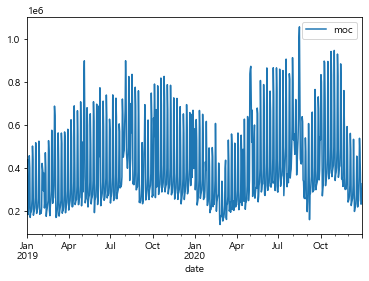

In [4]:
from matplotlib import pyplot
df.plot(x='date', y='moc', kind='line')

In [5]:
df.columns = ['ds', 'y']
df

,ds,y
0,2019-01-01,438460
1,2019-01-02,183397
2,2019-01-03,195637
3,2019-01-04,230425
4,2019-01-05,456959
...,...,...
726,2020-12-27,370376
727,2020-12-28,232478
728,2020-12-29,233149
729,2020-12-30,234594


In [6]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
future = m.make_future_dataframe(periods=365) # make_future_dataframe = 기간 설정 , periods = 예측할 날짜
forecast = m.predict(future)

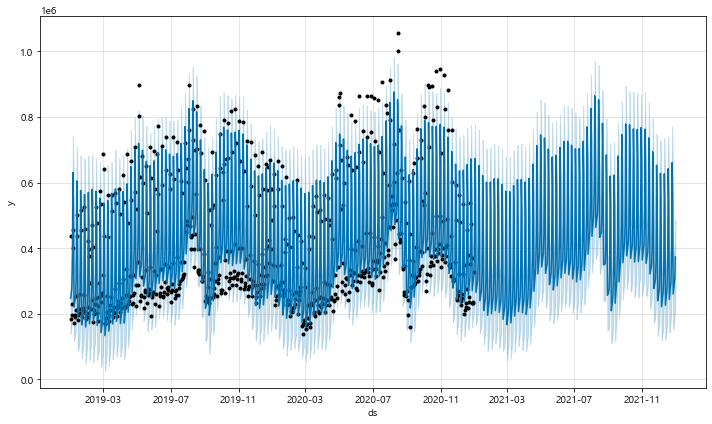

In [8]:
fig1= m.plot(forecast)

C:\Users\yechan\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 8722 missing from current font.

C:\Users\yechan\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning:

Glyph 8722 missing from current font.



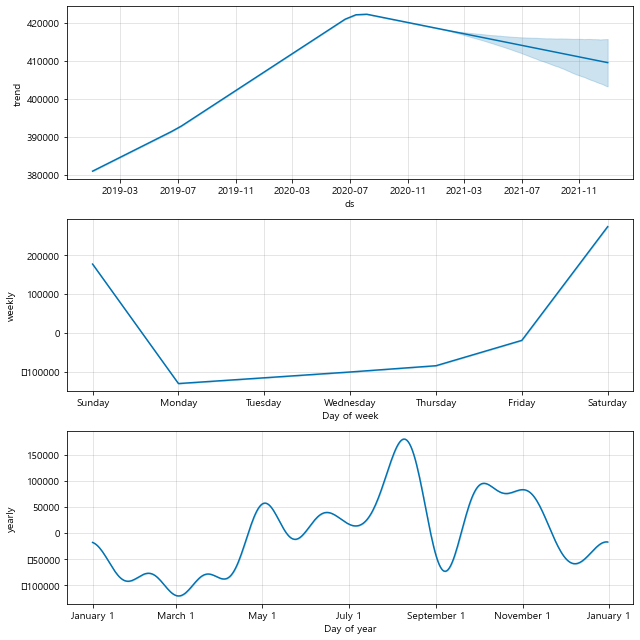

In [9]:
fig2 = m.plot_components(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
C:\Users\yechan\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 8722 missing from current font.

C:\Users\yechan\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning:

Glyph 8722 missing from current font.



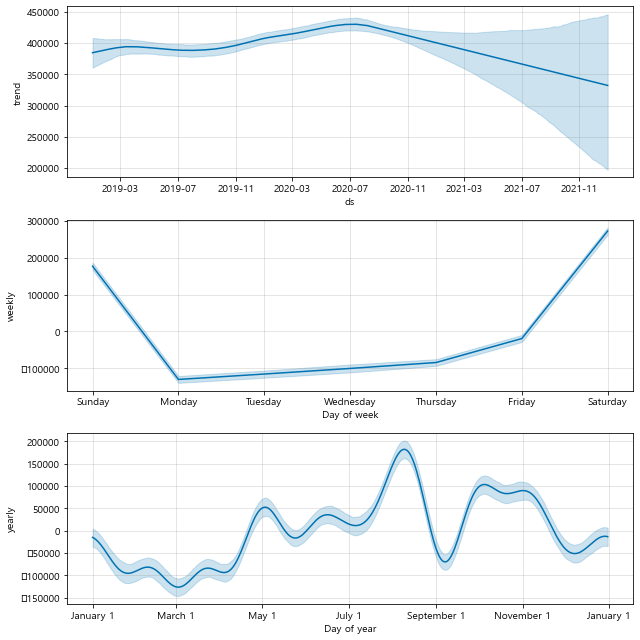

In [10]:
m = Prophet(mcmc_samples=300)
forecast = m.fit(df).predict(future)
fig = m.plot_components(forecast)

In [11]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,384556.971097,138911.116387,372292.385351,360849.077297,408209.695786,-129826.589449,-152254.430867,-107260.289234,-115671.681367,-125772.588019,-106169.835092,-14154.908082,-35296.579223,5682.886212,0.0,0.0,0.0,254730.381649
1,2019-01-02,384725.153971,156954.621538,383691.752515,361021.882980,408012.628252,-116167.934801,-140025.241951,-93816.542929,-100468.184210,-111285.729232,-89816.374834,-15699.750591,-36391.062827,3515.379300,0.0,0.0,0.0,268557.219170
2,2019-01-03,384893.336845,167943.867007,395773.391365,361233.704017,408052.062210,-102138.416377,-124921.178698,-80395.108236,-84414.870374,-93693.299367,-75276.685844,-17723.546004,-37605.323416,2241.815577,0.0,0.0,0.0,282754.920467
3,2019-01-04,385061.519718,236285.979789,451123.523659,361800.715660,408091.496167,-39482.992151,-62497.461229,-15174.806716,-19271.831408,-28462.853223,-9612.160993,-20211.160743,-39571.755443,-807.570512,0.0,0.0,0.0,345578.527567
4,2019-01-05,385229.702592,522035.133927,745992.675740,362390.822334,407802.497969,249793.948218,226641.586414,271402.208858,272933.156045,262756.025055,282848.189306,-23139.207827,-42371.416515,-3529.167614,0.0,0.0,0.0,635023.650809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2021-12-27,332918.826860,25539.650550,345279.885510,199529.549444,445029.797125,-143694.544410,-166006.345875,-123053.205131,-130359.678688,-139671.115668,-121023.061054,-13334.865721,-34509.992760,7222.018472,0.0,0.0,0.0,189224.282450
1092,2021-12-28,332731.359957,31288.271392,371308.698514,198949.892611,445246.176869,-128320.123617,-151780.220031,-105212.621277,-115671.681367,-125772.588019,-106169.835092,-12648.442250,-33920.946871,7991.112953,0.0,0.0,0.0,204411.236340
1093,2021-12-29,332543.893054,48426.298668,369670.835678,198372.152534,445621.299531,-112870.816692,-137943.406158,-88948.114296,-100468.184210,-111285.729232,-89816.374834,-12402.632482,-33703.115914,7941.774422,0.0,0.0,0.0,219673.076362
1094,2021-12-30,332356.426152,59730.562237,398177.745841,197804.099053,446017.265884,-97034.652048,-119191.487699,-74903.312554,-84414.870374,-93693.299367,-75276.685844,-12619.781674,-33775.730255,7553.513299,0.0,0.0,0.0,235321.774104
